In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#--------------------------------------
from scipy.stats import skew
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols                    # For n-way ANOVA
from statsmodels.stats.anova import anova_lm               # For n-way ANOVA
from scipy.stats import chi2_contingency                   # For Chi-Sq 

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Kaggle\Insurance\insurance.csv")
df1 = df.copy()

# Read and Understand Data

In [3]:
df1.sample(10) # inspect data, print any 10

,age,sex,bmi,children,smoker,region,charges
578,52,male,30.200,1,no,southwest,9724.53000
688,47,female,24.100,1,no,southwest,26236.57997
281,54,male,40.565,3,yes,northeast,48549.17835
298,31,male,34.390,3,yes,northwest,38746.35510
854,49,female,23.845,3,yes,northeast,24106.91255
832,28,female,23.845,2,no,northwest,4719.73655
37,26,male,20.800,0,no,southwest,2302.30000
737,26,male,23.700,2,no,southwest,3484.33100
197,45,female,28.600,2,no,southeast,8516.82900
451,30,male,24.130,1,no,northwest,4032.24070


In [4]:
df1.columns.to_list()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [5]:
df1.shape

(1338, 7)

In [6]:
df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df1.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# categorical features -----------------> sex, children, smoker, region.
# continuous features ------------------> age, bmi, charges.
# no missing values.

In [10]:
#changing object dtype to category  to save memory
df1.sex = df1['sex'].astype('category')
df1.smoker = df1['smoker'].astype('category')
df1.region = df1['region'].astype('category')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [12]:
# memory usage reduced from 73.3 kb to 46.3 kb

In [13]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
## Observations

# Average age of the primary beneficiary is 39.2 and maximum age is 64.
# Average BMI is 30.66, that is out of normal BMI range, Maximum BMI is 53.13
# Average medical costs billed to health insurance is 13270, median is 9382 and maximum is 63770
  # Median is less than mean in charges , indicating distrubution is postively skewed .
# Customer on an average has 1 child.
# For Age, BMI, children , mean is almost equal to median , suggesting data is normally distrubuted

In [15]:
# Are there more Male beneficary ?
# Are there more smoker ?
# which region has maximum claims?

df1.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [16]:
# get counts of unique observations for each category variable
list_cols = df1.select_dtypes(['category']).columns
for i in range(len(list_cols)):
    print(df1[list_cols[i]].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [17]:
# Observations

# 676 male and 662 female, indicated sample has slightly more males than females.
# 1064 nonsomker and 274 smoker, indicating sample has more nonsmokers.
# Number of claims from customer who reside in southeast region is more compared to other regions

# Exploratory Data Analysis

# Univariate Analysis

In [18]:
# function plots a combined graph for univariate analysis of continous variable 
#to check spread, central tendency , dispersion and outliers 

def dist_box(data):
    Name=data.name.upper()
    
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    
    sns.histplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})   

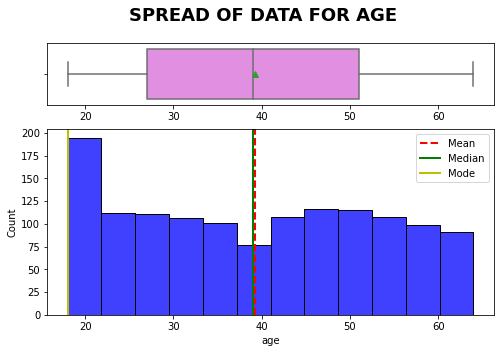

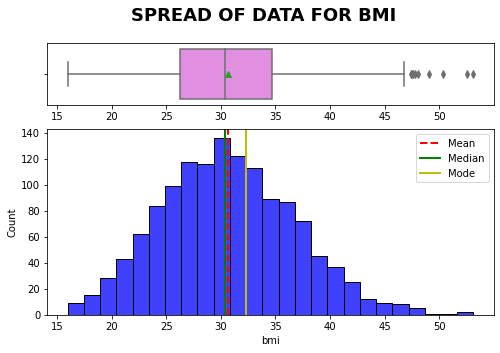

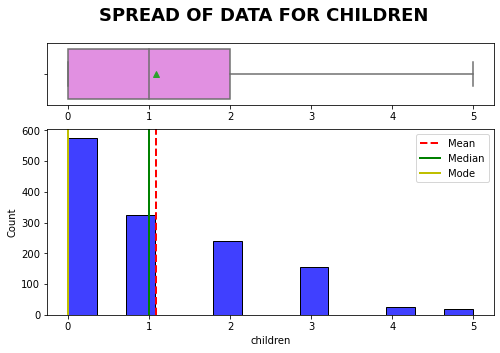

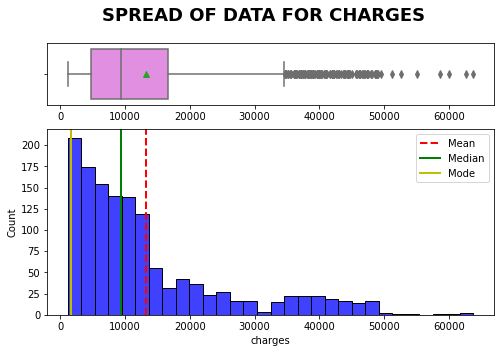

In [19]:
#select all quantitative columns for checking the spread
list_col=  df1.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(df1[list_col[i]]) 

In [20]:
#df1.select_dtypes([np.number]).columns-----------------------selects all continuous feature cols.

In [21]:
#  Observations

# Age of primary beneficary lies approximately between 20 - 65 . Average Age is aprrox. 40. 
  # Majority of customer are in range 18- 20's.
# Bmi is normally distrubuted and Average BMI of beneficiary is 30.This BMI is outside the normal range of BMI. 
  # There are lot of outliers at upper end
# Most of the beneficary have no childrens.
# Charges distrubution is unimodal and is right skewed .Average cost incured to the insurance is appro. 130000 
  # and highest charge is 63770.There are lot of outliers at upper end

In [22]:
# Function to create barplots that indicate percentage for each category.

def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05                  # width of the plot
        y = p.get_y() + p.get_height()                            # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12)              # annotate the percentage

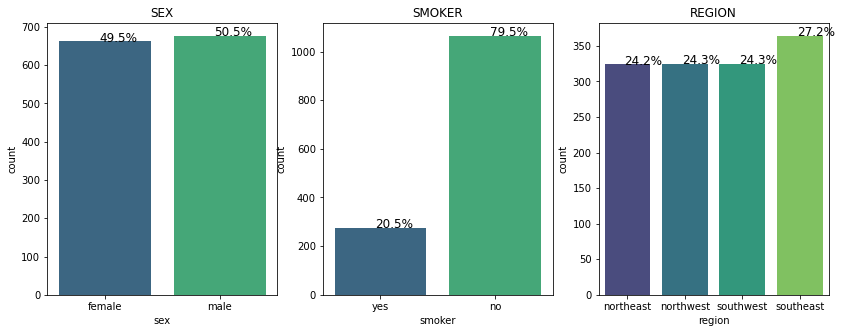

In [23]:
#get all category datatype 

list_col=  df1.select_dtypes(['category']).columns
fig1, axes1 =plt.subplots(1,3,figsize=(14, 5))
for i in range(len(list_col)):
    order = df1[list_col[i]].value_counts(ascending=True).index                     # to display bar in ascending order
    sns.countplot(x=list_col[i], data=df1 , order=order,ax=axes1[i], palette='viridis').set(title=list_col[i].upper())
    bar_perc(axes1[i],df1[list_col[i]])

In [24]:
# Observations

# 50.5% of beneficiary are male and 49.5 % are female. Approximately same number of male and female beneficiary.
# 20.5% of beneficary are smokers.
# Beneficary are evenly distributed across regions with South East being the most populous one (~27%) 
  #with the rest of regions each containing around ~24%
# Most of the beneficiary don't have kid.

# Bivariate & Multivariate Analysis

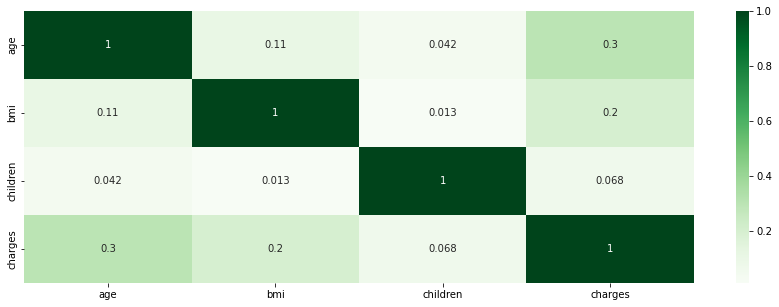

In [25]:
plt.figure(figsize=(15,5))
sns.heatmap(df1.corr(),annot=True ,cmap="Greens" )
plt.show()

In [26]:
# Observation

# There is very little significant correlation between charges & age and charges and bmi.

In [27]:
cat_cols = df1.select_dtypes('category').columns
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

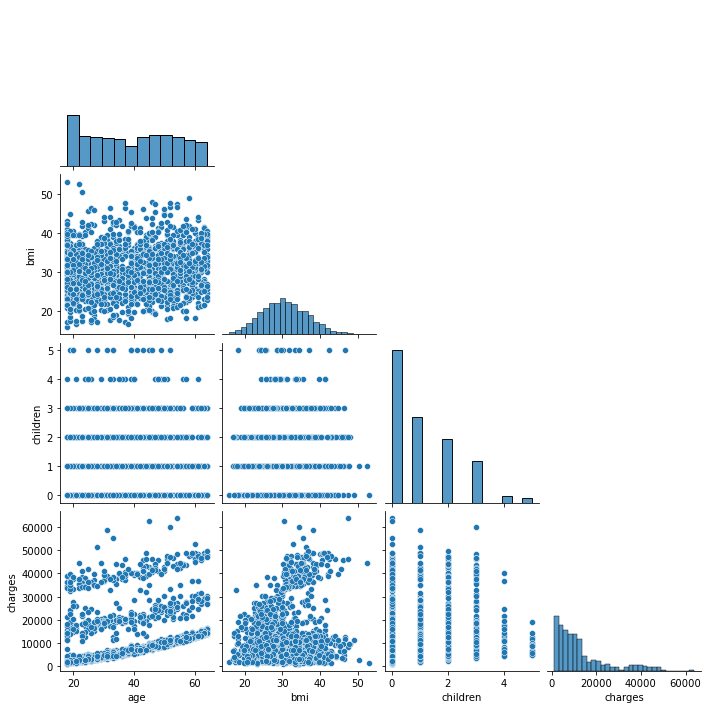

In [28]:
sns.pairplot(data=df1 , corner=True)
plt.show()

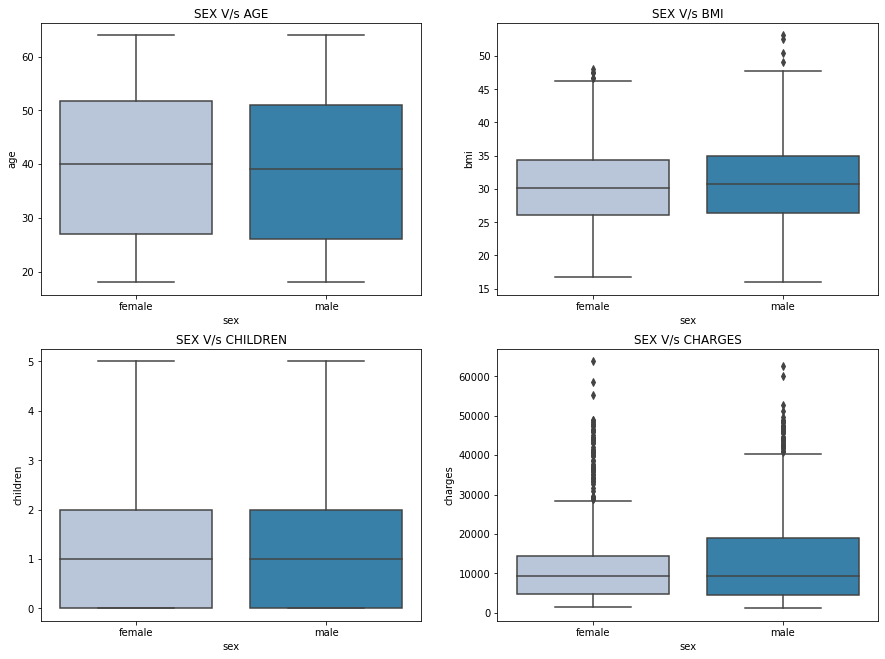

In [35]:
#Sex vs all numerical variable

fig1, axes1 = plt.subplots(2,2, figsize=(15,11))

#select all quantitative columns for checking the spread

list_cols = df1.select_dtypes([np.number]).columns
for i in range(len(list_cols)):
    row = i//2
    col = i%2
    ax = axes1[row, col]
    sns.boxplot(y=df1[list_cols[i]],x=df1['sex'],ax=ax,palette='PuBu',orient='v').set(title='SEX V/s '+list_col[i].upper())

In [36]:
# Observation

# Avergae Age of female beneficiary is slightly higher than male beneficiary
# No of children both male and female beneficary have is same
# BMI of Male policy holder has many outliers and Average BMI of male is slightly higher than female
# Male policy holder has incure more charges to insurance compared to female policy holder. 
# There are lot of outliers in female policy holder

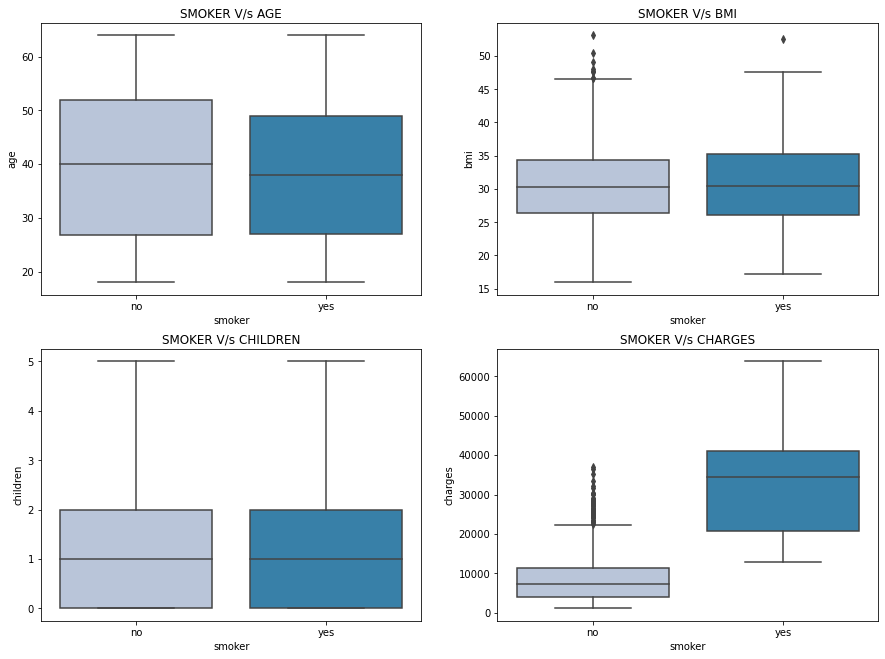

In [37]:
#smoker vs all numerical variable

fig1, axes1 = plt.subplots(2,2, figsize=(15,11))

#select all quantitative columns for checking the spread

list_cols = df1.select_dtypes([np.number]).columns
for i in range(len(list_cols)):
    row = i//2
    col = i%2
    ax = axes1[row, col]
    sns.boxplot(y = df1[list_cols[i]], x = df1['smoker'], ax = ax, palette = 'PuBu', orient='v').set(title = 'SMOKER V/s ' + list_col[i].upper())

In [38]:
# Observation

# Smoker have incured more cost to insurance than nonsmoker. There are outliers in nonsmoker , need to analyze.
# BMI of non smoker has lot of outliers.

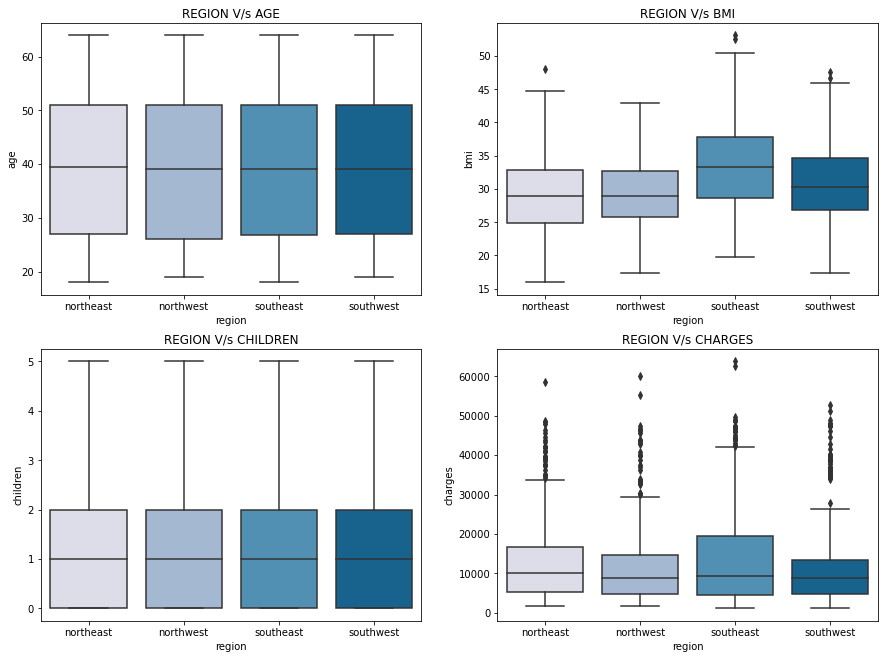

In [39]:
#region vs all numerical variable

fig1, axes1 = plt.subplots(2,2, figsize=(15,11))

#select all quantitative columns for checking the spread

list_cols = df1.select_dtypes([np.number]).columns
for i in range(len(list_cols)):
    row = i//2
    col = i%2
    ax = axes1[row, col]
    sns.boxplot(y = df1[list_cols[i]], x = df1['region'], ax = ax, palette = 'PuBu', orient='v').set(title = 'REGION V/s ' + list_col[i].upper())

In [40]:
# Observations

# Age and numnber of children across regions is almost same.
# Average Bmi of policy holder from southeast higher compared to other regions
# Charges incured because of policy holder from southeast is higher compared to othe regions
# There are lot of outliers on upper end in charges

[Text(0.5, 1.0, 'Smoker vs Sex')]

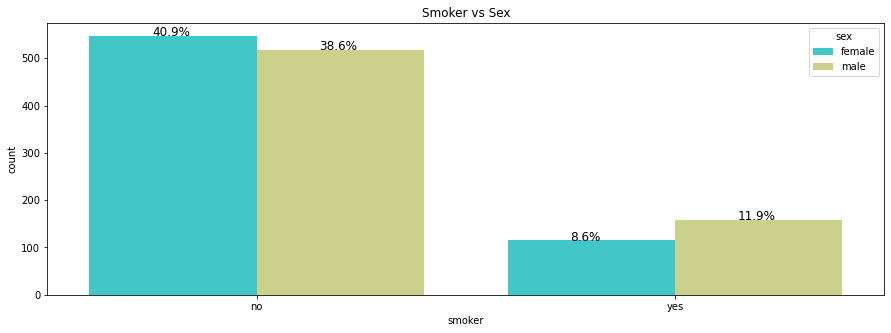

In [41]:
#smoker vs Sex

plt.figure(figsize = (15,5))
ax = sns.countplot(x='smoker',hue='sex',data=df1,palette='rainbow')
bar_perc(ax, df1['sex'])
ax.set(title = 'Smoker vs Sex')

[Text(0.5, 1.0, 'Smoker V/s Charges')]

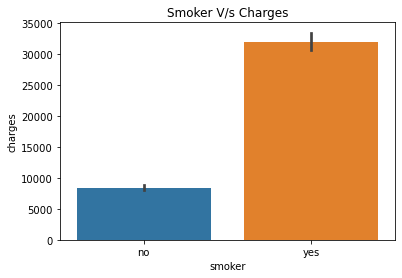

In [42]:
#smoker vs charges

sns.barplot(x = df1['smoker'], y = df1['charges']).set(title = 'Smoker V/s Charges')

[Text(0.5, 1.0, 'Smoker V/s Region')]

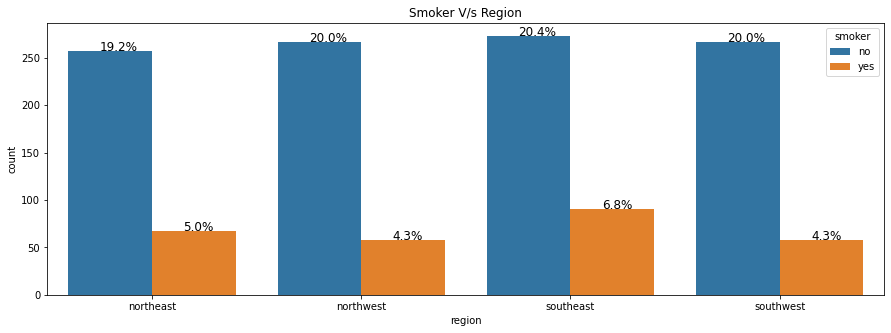

In [43]:
# smoker vs region

plt.figure(figsize = (15,5))
ax = sns.countplot(x = 'region', hue = 'smoker', data = df1)
bar_perc(ax, df1['region'])
ax.set(title = 'Smoker V/s Region')

In [44]:
# Observation

# There are more male smokers than female.
# Southeast region has more smokers
# Smoker have more costlier claims than nonsmoker.

[Text(0.5, 1.0, 'Sex V/s Region')]

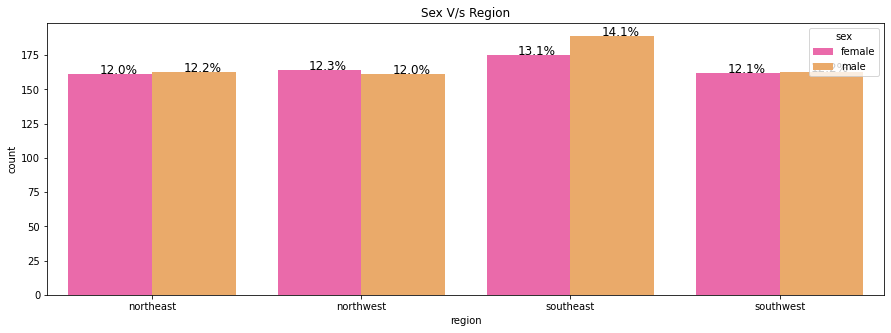

In [45]:
# Sex V/s Region

plt.figure(figsize = (15,5))
ax = sns.countplot(x= 'region', hue = 'sex', data= df1, palette = 'spring')
bar_perc(ax, df1['sex'])
ax.set(title = 'Sex V/s Region')

In [46]:
# Observations

# There are more males in southeast region compared to other regions.

In [47]:
df1.groupby(df1['sex']).charges.mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

[Text(0.5, 1.0, 'Children vs Charges')]

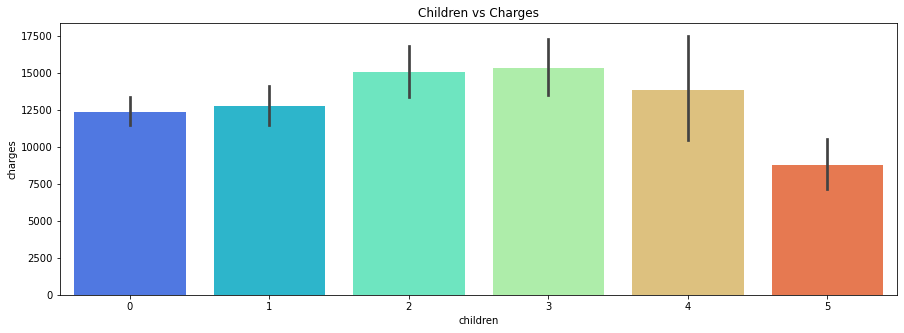

In [48]:
plt.figure(figsize = (15,5))
sns.barplot(x = df1['children'], y = df1['charges'], palette = 'rainbow').set(title = 'Children vs Charges')

[Text(0.5, 1.0, 'Sex vs Charges')]

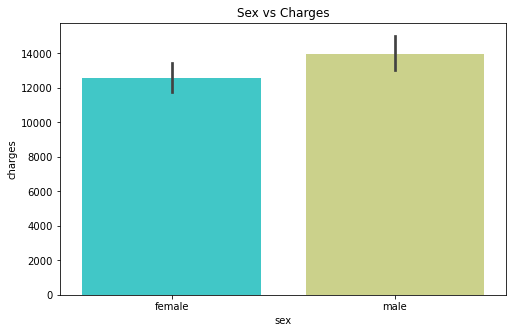

In [49]:
plt.figure(figsize = (8,5))
sns.barplot(x = df1['sex'], y = df1['charges'], palette = 'rainbow').set(title = 'Sex vs Charges')

[Text(0.5, 1.0, 'Region vs Charges')]

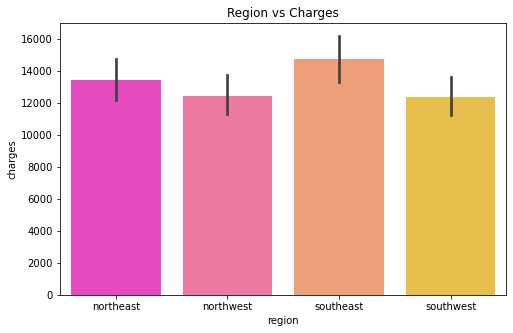

In [50]:
plt.figure(figsize = (8,5))
sns.barplot(x = df1['region'], y = df1['charges'], palette = 'spring').set(title = 'Region vs Charges')

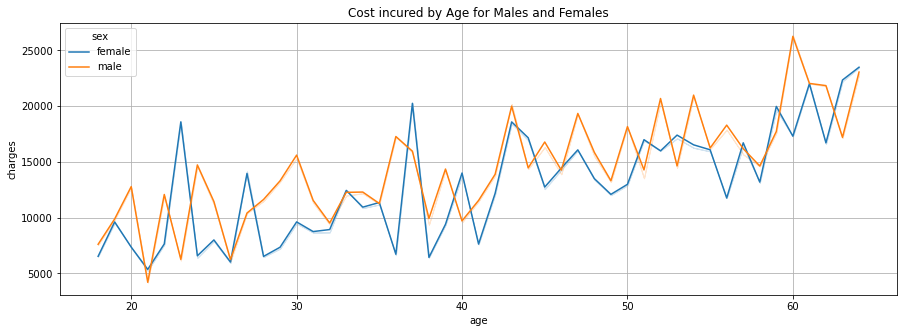

In [51]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df1['age'], y=df['charges'], hue=df1['sex'], ci=0).set(title='Cost incured by Age for Males and Females')
plt.grid()

In [52]:
pd.crosstab(index=df1.smoker,columns=df1.sex , values=df1.charges ,aggfunc='sum')

# df1.groupby(['smoker', 'sex']).charges.sum().unstack() ------------- same o/p

sex,female,male
smoker,,
no,4.792977e+06,4.181085e+06
yes,3.528085e+06,5.253679e+06


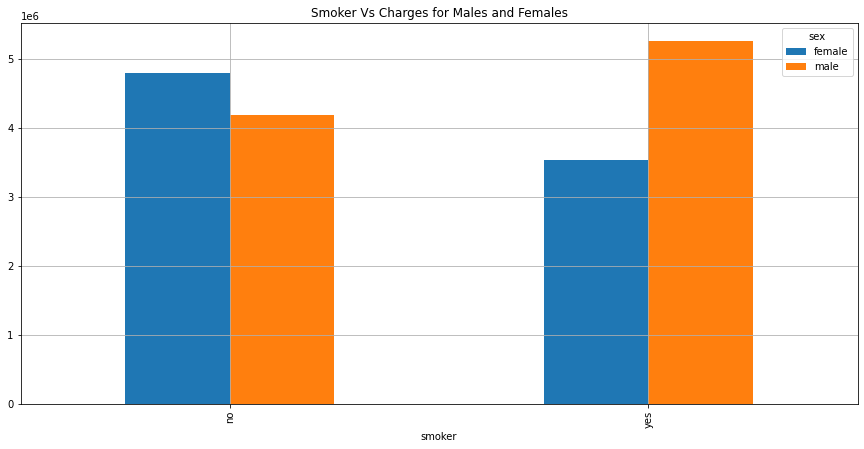

In [53]:
df_smoker_char_sex = pd.crosstab(index=df1.smoker,columns=df1.sex , values=df1.charges ,aggfunc='sum')
fig1, axes1=plt.subplots(1,1,figsize=(15, 7))
df_smoker_char_sex.plot(kind='bar',ax=axes1,title="Smoker Vs Charges for Males and Females")
plt.grid()

In [54]:
# Observations

# Charges incurred for males are more than charges incured for females
# With increasing age of policy holder charges incured are going high for both male and female.
# There some spikes for female at an approximate ages of 23,28,38,43.
# Most claims are from southeast regions.
# Males who smoke have most claims and have higher bills
# Number of claims made by female who dont smoke is more compared to female who smoke.

In [55]:
#creating groups of bmi

cat = pd.cut(df1['bmi'], bins=[15,25,35,45,55], labels=['15-25','25-35','35-45','45-55'])
df1.insert(5, 'BMIGroup', cat)

In [56]:
df1.head(10)

,age,sex,bmi,children,smoker,BMIGroup,region,charges
0,19,female,27.900,0,yes,25-35,southwest,16884.92400
1,18,male,33.770,1,no,25-35,southeast,1725.55230
2,28,male,33.000,3,no,25-35,southeast,4449.46200
3,33,male,22.705,0,no,15-25,northwest,21984.47061
4,32,male,28.880,0,no,25-35,northwest,3866.85520
5,31,female,25.740,0,no,25-35,southeast,3756.62160
6,46,female,33.440,1,no,25-35,southeast,8240.58960
7,37,female,27.740,3,no,25-35,northwest,7281.50560
8,37,male,29.830,2,no,25-35,northeast,6406.41070
9,60,female,25.840,0,no,25-35,northwest,28923.13692


In [57]:
# no. of children has no relation with charges

df1.groupby(df1['children']).charges.mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [58]:
df1.groupby(df1['BMIGroup']).charges.mean()

BMIGroup
15-25    10284.290025
25-35    12720.254311
35-45    16913.681515
45-55    17547.926750
Name: charges, dtype: float64

In [59]:
#creating groups of age

cat1 = pd.cut(df1['age'], bins=[17,28,38,48,58,68], labels=['18-28','28-38','38-48','48-58','58-68'])
df1.insert(6, 'AgeBin', cat1)

In [60]:
df1.head(10)

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,charges
0,19,female,27.900,0,yes,25-35,18-28,southwest,16884.92400
1,18,male,33.770,1,no,25-35,18-28,southeast,1725.55230
2,28,male,33.000,3,no,25-35,18-28,southeast,4449.46200
3,33,male,22.705,0,no,15-25,28-38,northwest,21984.47061
4,32,male,28.880,0,no,25-35,28-38,northwest,3866.85520
5,31,female,25.740,0,no,25-35,28-38,southeast,3756.62160
6,46,female,33.440,1,no,25-35,38-48,southeast,8240.58960
7,37,female,27.740,3,no,25-35,28-38,northwest,7281.50560
8,37,male,29.830,2,no,25-35,28-38,northeast,6406.41070
9,60,female,25.840,0,no,25-35,58-68,northwest,28923.13692


In [61]:
df1.groupby(df1['AgeBin']).mean()['charges']

AgeBin
18-28     9096.109860
28-38    11598.554943
38-48    14334.585843
48-58    15887.954341
58-68    20824.972901
Name: charges, dtype: float64

In [62]:
df1.groupby(['region', 'sex', 'smoker']).charges.mean().unstack()

smoker                     no           yes
region    sex                              
northeast female  9640.426984  28032.046398
          male    8664.042222  30926.252583
northwest female  8786.998679  29670.824946
          male    8320.689321  30713.181419
southeast female  8440.205552  33034.820716
          male    7609.003587  36029.839367
southwest female  8234.091260  31687.988430
          male    7778.905534  32598.862854

[Text(0.5, 1.0, 'Age Vs Charges')]

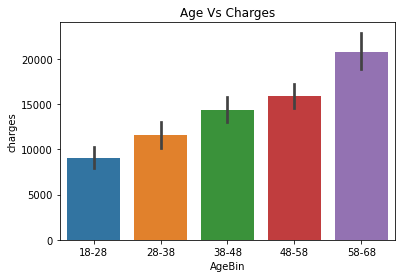

In [63]:
sns.barplot(x = df1['AgeBin'], y = df1['charges']).set(title = 'Age Vs Charges')

[Text(0.5, 1.0, 'BMI Vs Charges')]

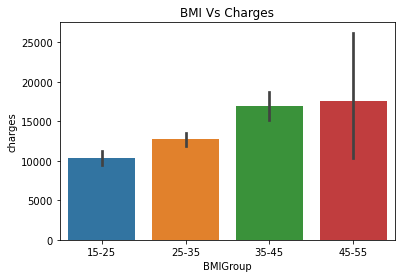

In [64]:
sns.barplot(x = df1['BMIGroup'], y = df1['charges']).set(title = 'BMI Vs Charges')

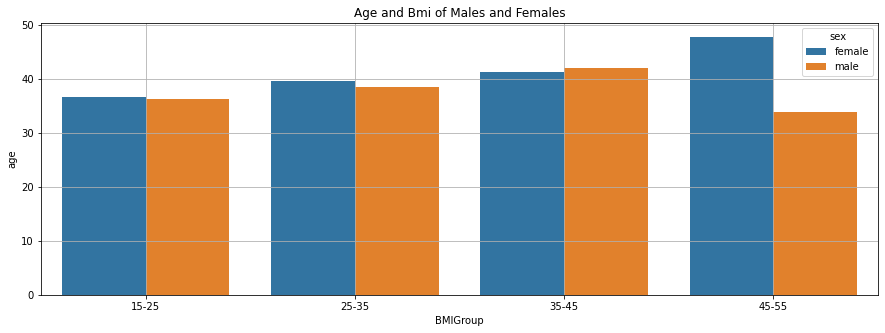

In [65]:
plt.figure(figsize = (15,5))
sns.barplot(x = df1['BMIGroup'], y = df1['age'], hue = df1['sex'], ci=0).set(title= 'Age and Bmi of Males and Females')
plt.grid()

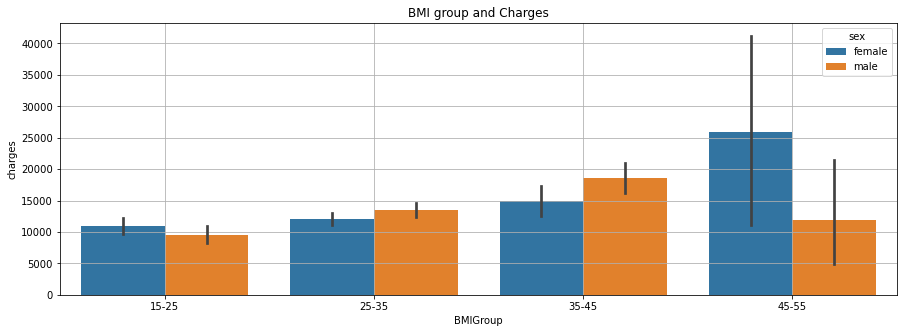

In [66]:
plt.figure(figsize = (15,5))
sns.barplot(x = df1['BMIGroup'], y = df1['charges'], hue = df1['sex']).set(title= 'BMI group and Charges')
plt.grid()

In [67]:
# Observations

# FeMales with most BMI has incured most charges to the insurance company
# BMI for male and females are not same
# Beneficary with higher BMI have incurred more cost to insurance.

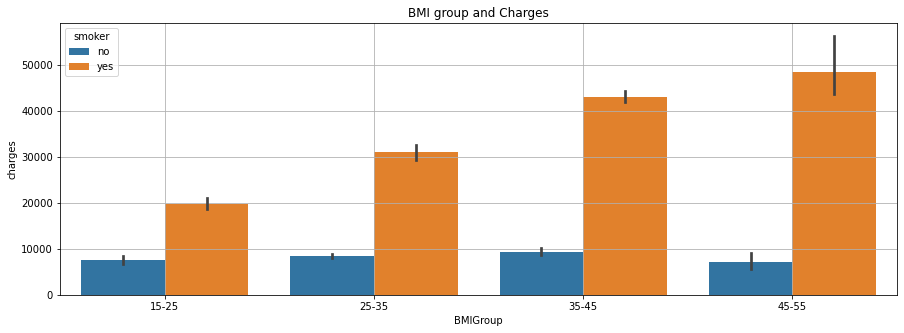

In [68]:
plt.figure(figsize = (15,5))
sns.barplot(x = df1['BMIGroup'], y = df1['charges'], hue = df1['smoker']).set(title= 'BMI group and Charges')
plt.grid()

In [69]:
# Observation

# As age increased claims increased -Smoker have higher medical claims

In [110]:
df1['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

# Conclusion based on EDA

In [70]:
# As expected , as the age of the beneficiary increases ,the cost to insurance increases.
# Males who smoke have most claims and have higher bills.
# Female who are nonsmoker also have more claims to nonsmoker males this may be because of child birth , 
  # need to explore claims type to understand better.
# Beneficiary with 2 or 3 dependent have billed higher compared to others people who have 5.
  # This is unusual and may be because of uneven number of observations in each group. 
  # For example, no dependents group has 574 observations whereas five dependents group only has 18.
# Customer with bmi >30 are on higher side of obesity, have more health issues and have higher claims.
# Females with BMI more than 45 have billed higher to insurance.
# Age, BMI and Smoking are important attributes which can cost insurance company more.

# Statistical Analysis

# 1. Prove (or disprove) that the medical claims made by the people who smoke        is greater than those who don't?

In [71]:
# Step 1: Define null and alternative hypothesis
#  H0: μ1<=μ2  The average charges of smokers is less than or equal to nonsmokers
#  Ha: μ1>μ2  The average charges of smokers is greater than nonsmokers
    
# Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.
  # α = 0.05

# Step 3: Identify the test
  # Standard deviation of the population is not known ,will perform a T stat test . 
  # The > sign in alternate hypothesis indicate test is right tailed, that is all z values that would cause us to reject 
  # null hypothesis are in just one tail to the right of sampling distribution curve.

# Step 4: Calculate the test-statistics and p-value.

In [72]:
smoker = df1[df1.smoker=="yes"]
smoker.head(10)

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,charges
0,19,female,27.90,0,yes,25-35,18-28,southwest,16884.92400
11,62,female,26.29,0,yes,25-35,58-68,southeast,27808.72510
14,27,male,42.13,0,yes,35-45,18-28,southeast,39611.75770
19,30,male,35.30,0,yes,35-45,28-38,southwest,36837.46700
23,34,female,31.92,1,yes,25-35,28-38,northeast,37701.87680
29,31,male,36.30,2,yes,35-45,28-38,southwest,38711.00000
30,22,male,35.60,0,yes,35-45,18-28,southwest,35585.57600
34,28,male,36.40,1,yes,35-45,18-28,southwest,51194.55914
38,35,male,36.67,1,yes,35-45,28-38,northeast,39774.27630
39,60,male,39.90,0,yes,35-45,58-68,southwest,48173.36100


In [73]:
smoker.count()

age         274
sex         274
bmi         274
children    274
smoker      274
BMIGroup    274
AgeBin      274
region      274
charges     274
dtype: int64

In [74]:
non_smoker = df1[df1.smoker=="no"]
non_smoker.head(10)

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,charges
1,18,male,33.770,1,no,25-35,18-28,southeast,1725.55230
2,28,male,33.000,3,no,25-35,18-28,southeast,4449.46200
3,33,male,22.705,0,no,15-25,28-38,northwest,21984.47061
4,32,male,28.880,0,no,25-35,28-38,northwest,3866.85520
5,31,female,25.740,0,no,25-35,28-38,southeast,3756.62160
6,46,female,33.440,1,no,25-35,38-48,southeast,8240.58960
7,37,female,27.740,3,no,25-35,28-38,northwest,7281.50560
8,37,male,29.830,2,no,25-35,28-38,northeast,6406.41070
9,60,female,25.840,0,no,25-35,58-68,northwest,28923.13692
10,25,male,26.220,0,no,25-35,18-28,northeast,2721.32080


In [75]:
non_smoker.count()

age         1064
sex         1064
bmi         1064
children    1064
smoker      1064
BMIGroup    1064
AgeBin      1064
region      1064
charges     1064
dtype: int64

In [76]:
# Adjusting the size of the rows to be equal

non_smoker = non_smoker[-274:]
charges_yes = smoker.charges
charges_no = non_smoker.charges

In [77]:
print('Average Cost charged to Insurance for smoker is {:.2f} and nonsmoker is {:.2f} '.format(charges_yes.mean(),charges_no.mean()))

Average Cost charged to Insurance for smoker is 32050.23 and nonsmoker is 8441.25 


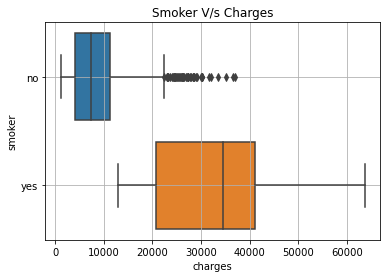

In [78]:
# Smoker V/s Charges

sns.boxplot(x = df1['charges'], y = df1['smoker']).set(title = 'Smoker V/s Charges')
plt.grid()

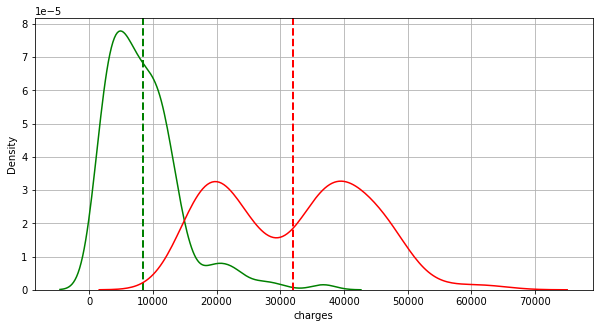

In [125]:
fig1, ax1 = plt.subplots(1, 1, figsize=(10,5))
plt.grid()
sns.kdeplot(non_smoker.charges, ax=ax1, color='green').axvline(non_smoker.charges.mean(), color='g', linestyle='--',linewidth=2)
sns.kdeplot(smoker.charges, ax=ax1, color='red').axvline(smoker.charges.mean(), color='r', linestyle='--',linewidth=2)

In [79]:
alpha=0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))

Test statistic = 30.168384427571915 , Pvalue =2.160499003168038e-118 , OnetailPvalue = 1.080249501584019e-118


In [80]:
if p_value_onetail <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_onetail,alpha))
    print('**********'*10)
    print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print('**********'*50)
    print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

Conclusion:Since P value 1.080249501584019e-118 is less than alpha 0.05 
****************************************************************************************************
Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.


In [81]:
# Step 5: Decide whethere to reject or failed to reject null hypothesis

# We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim 
# compared to people who don't smoke. Similar result can also been seen in Fig no.1 Smokers Vs Charges.

# 2. Prove (or disprove) with statistical evidence that the BMI of females is                different from that of males.

In [82]:
# Let  μ1μ2  and be the respective population means for BMI of males and BMI of females

# Step 1: Define null and alternative hypothesis
#  H0: μ1=μ2  There is no difference between the BMI of Male and BMI of female.
#  Ha: μ1!=μ2  There is difference between the BMI of Male and BMI of female.
    
# Step 2: Decide the significance level
# α = 0.05

# Step 3:Identify the test
# Standard deviation of the population is not known ,will perform a T stat test.
# Not equal to sign in alternate hypothesis indicate its a two tailed test.

# Step 4: Calculate the test-statistics and p-value

In [83]:
#get all observation for male.
df_male = df1[df1['sex']=='male']

#get all observation for females
df_female = df1[df1['sex']=="female"]

In [84]:
#get bmi of male and female

bmi_female = df_female['bmi']
bmi_male = df_male['bmi']

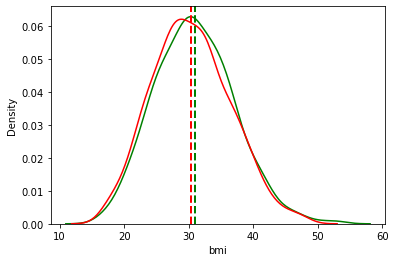

In [85]:
a1 = sns.kdeplot(bmi_male,color='green')
a1.axvline(bmi_male.mean(), color='g', linestyle='--',linewidth=2)

a2 = sns.kdeplot(bmi_female,color='red')
a2.axvline(bmi_female.mean(), color='r', linestyle='--',linewidth=2)

In [86]:
print('Male BMI mean : {:.2f}'.format(df_male.bmi.mean()))
print('***'*20)
print('Female BMI mean : {:.2f}'.format(df_female.bmi.mean()))

Male BMI mean : 30.94
************************************************************
Female BMI mean : 30.38


In [87]:
# get statistic and p value

t_statistic_2, p_value_2 = stats.ttest_ind(bmi_male, bmi_female)
print("Test statistic = {} , Pvalue ={} ".format(t_statistic_2, p_value_2))

Test statistic = 1.696752635752224 , Pvalue =0.08997637178984932 


In [88]:
if p_value_2 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_2, alpha))
    print('**********'*10)
    print("Reject Null Hypothesis that there is no difference between the BMI of Male and BMI of female.")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_2, alpha))
    print('**********'*10)
    print("Failed to Reject Null Hypothesis that there is no difference between the BMI of Male and BMI of female")

Conclusion:Since P value 0.08997637178984932 is greater than alpha 0.05 
****************************************************************************************************
Failed to Reject Null Hypothesis that there is no difference between the BMI of Male and BMI of female


# 3. Is the proportion of smokers significantly different across different regions?

In [89]:
# Step 1: Define null and alternative hypotheses.
#     H0: Smokers proportions is not significantly different across different regions.
#     Ha: Smokers proportions is different across different regions.
        
# Step 2: Decide the significance level
# α = 0.05

# Step 3: Identify Test
# Here we are comparing two different categorical variables, smoker and different region. So perform a Chi-sq Test.

# Step 4: Calculate the test-statistics and p-value

In [90]:
contigency= pd.crosstab(df1['region'], df1['smoker'])
contigency

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


<Figure size 1080x360 with 0 Axes>

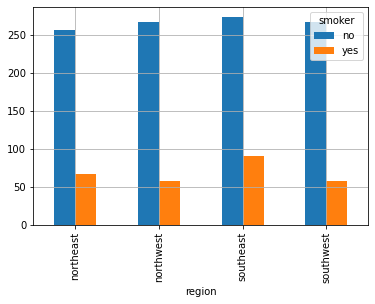

In [91]:
plt.figure(figsize = (15,5))
contigency.plot(kind = 'bar')
plt.grid()

In [92]:
# Using the chi2_contingency test 

chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction = False)
print('chi-square statistic: {} , \nPvalue: {} , \nDegree of freedom: {} , \nexpected frequencies: {} '.format(chi2, pval, dof, exp_freq))

chi-square statistic: 7.343477761407071 , 
Pvalue: 0.06171954839170541 , 
Degree of freedom: 3 , 
expected frequencies: [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 


In [93]:
if (pval < 0.05):
    print('Reject Null Hypothesis that Smoker proportions is not significantly different across different regions.')
else:
    print('Failed to reject Null Hypothesis that Smoker proportions is not significantly different across different regions.')

Failed to reject Null Hypothesis that Smoker proportions is not significantly different across different regions.


# 4. Is the mean BMI of women with no children, one child, and two children the same?

In [94]:
# Step 1: Define null and alternative hypotheses.
    
#     H0: μ1 = μ2 = μ3 The mean BMI of women with no children , one child,two children is same
#     Ha: Atleast one of mean BMI of women is not same.
        
# Step 2: Decide the significance level
# α = 0.05

# Step 3: Identify Test
# One-way ANOVA - Equality of population through variances of samples.

# Step 4: Calculate the test-statistics and p-value.

In [95]:
# Filtering data of only women with 0, 1 and 2 children

df_female_child = df_female[df_female['children']<=2]
df_female_child.head()

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,charges
0,19,female,27.90,0,yes,25-35,18-28,southwest,16884.92400
5,31,female,25.74,0,no,25-35,28-38,southeast,3756.62160
6,46,female,33.44,1,no,25-35,38-48,southeast,8240.58960
9,60,female,25.84,0,no,25-35,58-68,northwest,28923.13692
11,62,female,26.29,0,yes,25-35,58-68,southeast,27808.72510


In [96]:
df_female_child.groupby(df_female_child['children']).bmi.mean()

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

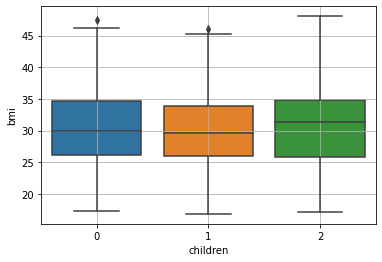

In [97]:
sns.boxplot(x = df_female_child["children"], y = df_female_child["bmi"])
plt.grid()
plt.show()

In [98]:
# Applying ANOVA and cheking each children count (0,1,2) with the bmi

formula = 'bmi ~ C(children)'
model = ols(formula, df_female_child).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(children),2.0,24.590123,12.295062,0.334472,0.715858
Residual,563.0,20695.661583,36.759612,NaN,NaN


In [99]:
# Step 5: Decide to reject or accept null hypothesis
# P value is 0.715858 and it is greater than alpha(0.05) ,We failed to reject the null hypothesis 
# and conclude that mean Bmi of women with no children,one children, two children is same.